## CLASIFICACIÓN CON UN ÁRBOL DE DECISIONES 
# 1) se cargas las liberías necesarias 

In [1]:

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_classification # sirve para crear dataset para clasifiación
from sklearn.model_selection import train_test_split # sirve para dividir el dataset en entrenamiento y prueba
from sklearn.tree import DecisionTreeClassifier # sirve para crear el modelo de árbol de decisión
from sklearn.metrics import classification_report # sirve para evaluar el modelo


# 2) Se hace el proceso de generar los datos
## las features son las variables de entrada que usa el modelo para hacer sus predicciones, usamos dos features creadas artificialmente estas variables pueden ser ingresos, edades, datos obtenidos de sensoricas  como temperatura, humedad, presión etc... 
## las clases son etiquetas o categorias que el modelo intenta predecir clase A y clase B ( 0 y 1, como quieran llamarla), el modelo aprende a clasificar las combinaciones de features en una de estas dos clases.

In [ ]:

X, y = make_classification(n_samples=200, n_features=2, n_redundant=0, n_clusters_per_class=1, n_classes=2, random_state=42) 
# samples numero de muestras, redundant numero de variables redundantes, cluster_per_class numero de clusters por clase 
# Podemos imaginar que el feature 1 es la temperatura en grados a partir de la media en un invernadero
# el feature 2 el movimiento de la flor con respecto a su media de apertura
# y es la clase que queremos predecir si es una termonastia A - si o B - 
## Random state es la seed para que los resultados sean reproducibles



# 3) Se hace la segmentación de datos de entrenamiento y de prueba

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) 
# test_size es el porcentaje de datos que se van a usar para la prueba, random_state es la semilla para que los resultados sean reproducibles

# 4) Se hace utiliza la herramienta **DecisionTreeClassifier** de la libreria scikit-learn para utilizar el modelom generar el entrenamiento y utilizarlo para generar una predicción

In [4]:

clf_tree = DecisionTreeClassifier(max_depth=3, random_state=42)
clf_tree.fit(X_train, y_train)
y_pred = clf_tree.predict(X_test)


# 5) Vamos a hacer las gráficas de los datos 
## el eje x es el feature 1 y el eje y es el featrure 2. Rojo (0) para clase A (si) y azul (1) para clase B (no)
## la forma del punto nos indica que, si la forma y el color son el mismo entonces la clasificación fue correcta, de lo contrario se puede decir que fue erronea. 

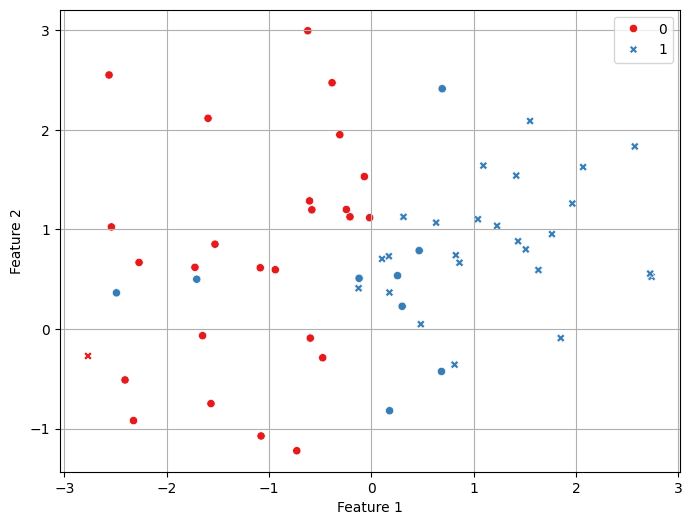

In [6]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_test[:, 0], y=X_test[:, 1], hue=y_pred, palette='Set1', style=y_test) 
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.grid(True)
plt.show()


# 6) vamos a hacer un reporte de la calsificación, 

In [5]:
print("Reporte de Clasificación (Árbol de Decisión):")
print(classification_report(y_test, y_pred))
# presición de los que el modelo predijo cuánto realmente son positivos
# recall de toso los positivos reales, cántos detectó el modelo
# F1 score es la media armonica entre la presición y el recall
# support es el número de muestras de cada clase en el conjunto de prueba
# accuracy es la presición global del modelo
# macro avg es la media de las métricas para cada clase
# weighted avg es la media ponderada de las métricas para cada clase, teniendo en cuenta el número de muestras de cada clase

Reporte de Clasificación (Árbol de Decisión):
              precision    recall  f1-score   support

           0       0.96      0.74      0.83        34
           1       0.74      0.96      0.83        26

    accuracy                           0.83        60
   macro avg       0.85      0.85      0.83        60
weighted avg       0.86      0.83      0.83        60



### BOSQUE ALEATORIO

# 1) Vamos usar las librerias para generar un bosque aleatorio

In [7]:
from sklearn.ensemble import RandomForestClassifier 
#Random Forest Classifier es una herramienta de aprendizaje automático que utiliza múltiples árboles de decisión 
# para mejorar la precisión y reducir el sobreajuste.
from sklearn.tree import plot_tree 
#plot_tree es una función de la biblioteca scikit-learn que se utiliza para visualizar árboles de decisión.

# 2)  vamos a usar el modelo para crear el bosque aleatorio 

In [8]:

clf_rf = RandomForestClassifier(n_estimators=100, random_state=42)
clf_rf.fit(X_train, y_train)
y_pred_rf = clf_rf.predict(X_test)

# 3) vamos a ver el reporte primero 

In [9]:

print("Reporte de Clasificación (Bosque Aleatorio):")
print(classification_report(y_test, y_pred_rf))

Reporte de Clasificación (Bosque Aleatorio):
              precision    recall  f1-score   support

           0       0.88      0.82      0.85        34
           1       0.79      0.85      0.81        26

    accuracy                           0.83        60
   macro avg       0.83      0.83      0.83        60
weighted avg       0.84      0.83      0.83        60



# 4) Ahora vamos a ver el arbol de decisión 

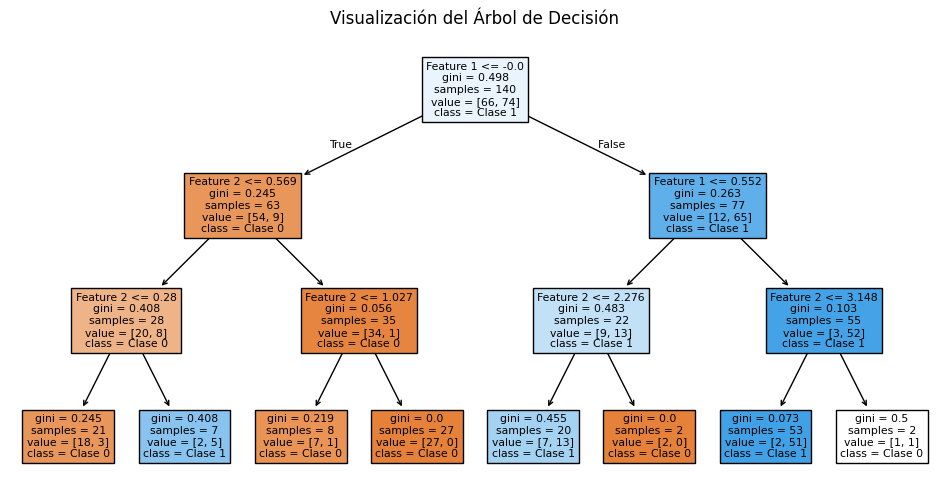

In [10]:

plt.figure(figsize=(12, 6))
plot_tree(clf_tree, filled=True, feature_names=["Feature 1", "Feature 2"], class_names=["Clase 0", "Clase 1"])
plt.title("Visualización del Árbol de Decisión")
plt.show()
